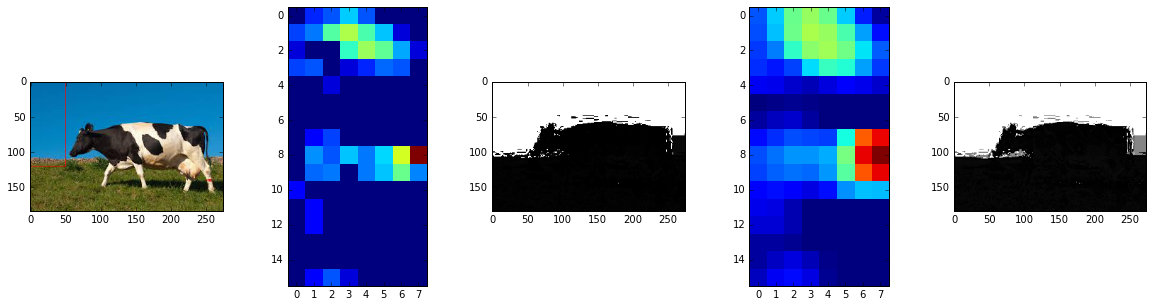

In [441]:
import cv2
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
#%matplotlib inline

from matplotlib.colors import LogNorm


target = cv2.imread("../images/cow3.jpg",cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)
rgb = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

# select the region of interest
xmin,ymin,xmax,ymax = 0,0,50,120

# draw the region and display it so we know we got the right region

cv2.rectangle(rgb,(xmin,ymin),(xmax,ymax),(255,0,0),1)

fig,ax = plt.subplots(1,5,figsize=(20,5))

ax[0].imshow(rgb)

roi = hsv[ymin:ymax,xmin:xmax]
hist = cv2.calcHist( [roi], [0, 1], None, [16, 8], [0, 180, 0, 256] )
hist_s = cv2.GaussianBlur(hist,(3,3),0)


ax[3].imshow(hist_s+1,interpolation="nearest",norm=LogNorm())
ax[1].imshow(hist+1,interpolation = 'nearest',norm=LogNorm())

cv2.normalize(hist,hist,0,1,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsv],[0,1],hist,[0, 180, 0, 256],scale=255) 
ax[2].imshow(dst,cmap="gray")

cv2.normalize(hist_s,hist_s,0,1,cv2.NORM_MINMAX)
dst2 = cv2.calcBackProject([hsv],[0,1],hist_s,[0, 180, 0, 256],scale=255) 
ax[4].imshow(dst2,cmap="gray")



In [237]:
np.unique(dst)

array([  0,   1, 255], dtype=uint8)

(184, 274)
(184, 274)


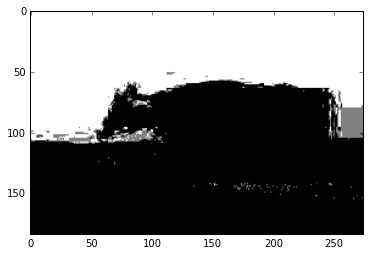

In [184]:
from scipy.stats import binned_statistic_2d

class BackProjector(object):    
    def __init__(self,chan1,chan2,bins1,bins2):
        self.chan1 = chan1
        self.chan2 = chan2
        self.bins1 = bins1
        self.bins2 = bins2
        
    def hist2d(self,image):
        c1 = image[:,:,self.chan1]
        c2 = image[:,:,self.chan2]
        hist,_,_,_ = binned_statistic_2d(np.ravel(c1), np.ravel(c2),None,statistic="count",bins = [self.bins1,self.bins2],expand_binnumbers=True )
        self.hist = hist
        return hist
    
    def back_project(self,image):
        c1 = image[:,:,self.chan1]
        c2 = image[:,:,self.chan2]
        print c1.shape
        print c2.shape
        _,_,_,bins = binned_statistic_2d(np.ravel(c1), np.ravel(c2),None,statistic="count",bins = [self.bins1,self.bins2],expand_binnumbers=True )
        bins = bins - 1
        hist_s = cv2.GaussianBlur(self.hist,(3,3),0)
        return hist_s[bins[0],bins[1]].reshape(c1.shape)
        
          
b = BackProjector(0,1,np.linspace(0,180,8),np.linspace(0,256,8))
b.hist2d(roi)
projected = b.back_project(hsv)
plt.imshow(projected,cmap="gray")    



In [505]:
np.pi*(7.5-.3)

22.61946710584651

In [511]:
(150-6)*np.pi/2.0

226.1946710584651

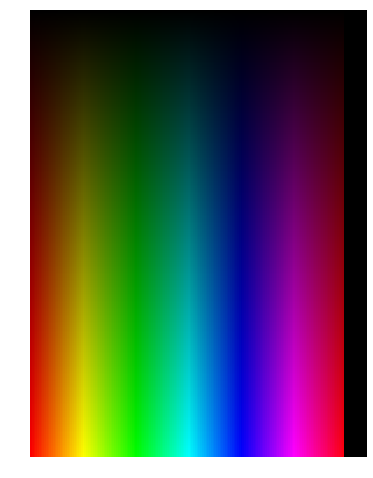

In [470]:
import matplotlib

def cm_to_inch(*centimeters):
    cm_per_inch = 2.54
    return tuple(x/cm_per_inch for x in centimeters)
    

def make_hsv():
    hsv = np.zeros((255,179,3),dtype=np.uint8)
    hsv[:,:,0] = np.arange(0,179)
    hsv[:,:,1] = 255
    v = np.arange(0,255)
    hsv[:,:,2] = np.resize(v,(179,len(v))).T
    return hsv


photo_width_cm = 25.4
photo_height_cm = 20.32
image_width = (np.pi*15)/2.0
ratio = photo_width_cm/image_width

hsv = make_hsv()
w = hsv.shape[1]
nw = int(ratio*w)
results = np.zeros((hsv.shape[0],nw,hsv.shape[2]),dtype="uint8")
results[0:hsv.shape[0],0:hsv.shape[1],:] = hsv



rgb = cv2.cvtColor(results,cv2.COLOR_HSV2RGB)
fig,ax = plt.subplots()
ax.set_axis_off()
ax.imshow(rgb,interpolation="nearest")
fig.set_size_inches(cm_to_inch(photo_width_cm, photo_height_cm))
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('/home/finn/programming/opencv-play/models/hue_value.png',bbox_inches=extent,dpi=300)


In [503]:
15/2.0

7.5

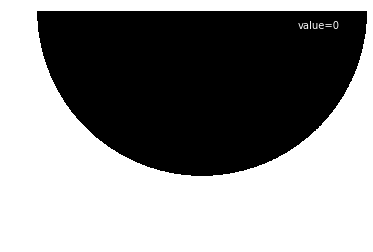

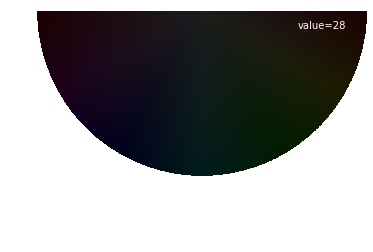

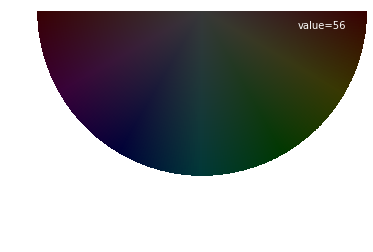

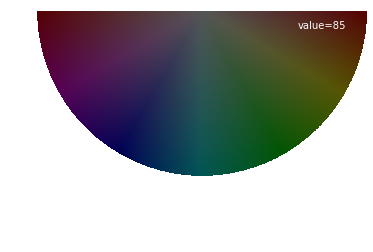

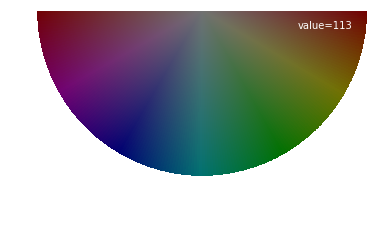

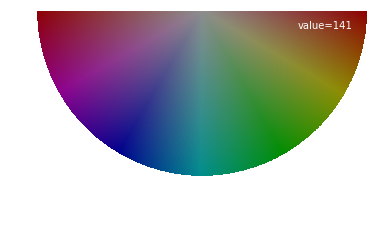

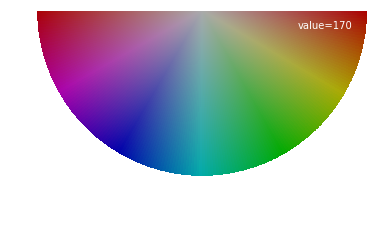

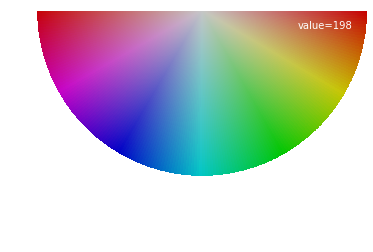

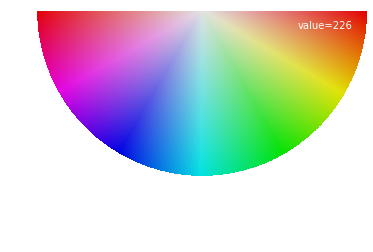

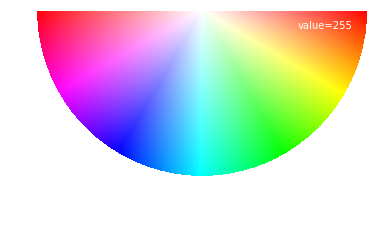

In [458]:
# plot hue vs saturation for a range of values

value = 255


def plot_hue_sat(value):
    width = int(5.9*300)
    height = int(2*width/3.0)
    rmax=int(width/2.0)
    x0 = int(width/2.0)
    result = np.zeros((height,width,3),dtype="uint8")
    for x in range(width):
        for y in range(height):
            radius = np.sqrt((x-x0)**2+y**2)/float(rmax)*255
            v = value
            if radius > 255:
                radius = 0
                v = 255
            theta = np.rad2deg(np.arctan2(y,x-x0))
            result[y,x,0] = theta
            result[y,x,1] = radius
            result[y,x,2] = v

    rgb = cv2.cvtColor(result,cv2.COLOR_HSV2RGB)    
    fig,ax = plt.subplots()
    fig.set_size_inches(cm_to_inch(15, 10))
    ax.set_axis_off()
    ax.imshow(rgb,interpolation="nearest")
    ax.annotate('value={}'.format(value),xy=(1400, 90), xycoords='data',color='white')
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    
    fig.savefig("/home/finn/programming/opencv-play/models/wheel{}.jpg".format(value),bbox_inches=extent,dpi=300)
for value in np.linspace(0,255,10):    
    plot_hue_sat(int(value))

In [457]:
np.pi*15/2.0

23.561944901923447

In [397]:
for x in range(width):
        for y in range(height):
            radius = np.sqrt((x-x0)**2+y**2)/float(rmax)*255
            v = value
            if radius > 255:
                radius = 0
                v = 255
            theta = np.rad2deg(np.arctan2(y,x-x0))
            result[y,x,0] = theta
            result[y,x,1] = radius
            result[y,x,2] = v

885

/home/finn/miniconda3/envs/latestp2/lib/python2.7/site-packages/ipykernel/__main__.py:43: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/finn/miniconda3/envs/latestp2/lib/python2.7/site-packages/ipykernel/__main__.py:44: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


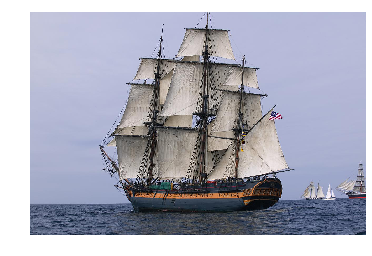

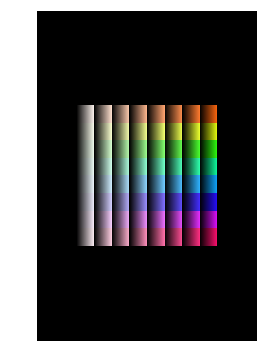

In [369]:
target = cv2.imread("../images/sailing_ship.jpg",cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(target, cv2.COLOR_BGR2HSV)
rgb = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

hist = cv2.calcHist([hsv],[0, 1],mask = None, histSize = [8,8], ranges = [0, 180, 0, 256])
nrows, ncols = hist.shape
bin_width = 8
max_height = bin_width*8
hist = hist/hist.max()*max_height

hues = [np.mean([a,b]) for (a, b) in zip(np.linspace(0,180,9),np.linspace(0,180,9)[1:])]
sats = [np.mean([a,b]) for (a, b) in zip(np.linspace(0,256,9),np.linspace(0,256,9)[1:])]
results = np.zeros((nrows*255,ncols*255,3),dtype="uint8")
for row in range(nrows):
    for col in range(ncols):
        hue = np.resize(hues[row],(255,255))
        sat = np.resize(sats[col],(255,255))
        value = np.resize(np.arange(0,255),(255,255))
        results[row*(255):(row+1)*255,col*(255):(col+1)*255,0] = hue
        results[row*(255):(row+1)*255,col*(255):(col+1)*255,1] = sat
        results[row*(255):(row+1)*255,col*(255):(col+1)*255,2] = value
        

fig,ax = plt.subplots()
ax.set_axis_off()
fig.set_size_inches(6,4)
ax.imshow(rgb,interpolation="nearest")
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig("/home/finn/programming/opencv-play/models/ship.jpg",bbox_inches=extent, dpi=300)

height = 15 #height in cm
width = 10 #width in mm
w = 6.4
h = 6.4 #intended width and height of plot
pixels = results.shape[0]

pixels_wide = width/w*pixels
pixels_high = height/h*pixels
gapw = (pixels_wide-pixels)/2.0
gaph = (pixels_high-pixels)/2.0
a = np.zeros((pixels_high,pixels_wide,3),dtype="uint8")
a[gaph:gaph+pixels,gapw:gapw+pixels,:] = results

rgb_hist = cv2.cvtColor(a,cv2.COLOR_HSV2RGB)
fig,ax = plt.subplots()
ax.set_axis_off()
fig.set_size_inches(cm_to_inch(10, 15))
ax.imshow(rgb_hist,interpolation="nearest")
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig("/home/finn/programming/opencv-play/models/2dhist_64.jpg",bbox_inches=extent,dpi=300)



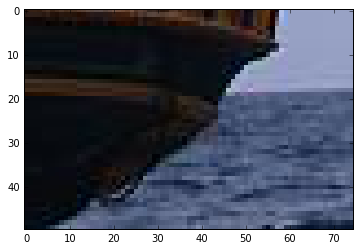

In [383]:
fig,ax = plt.subplots(figsize=(10,10))
roi = rgb[700:750,900:975,:]
ax.imshow(roi,interpolation="nearest")
fig.set_size_inches(cm_to_inch(15, 10))
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig("/home/finn/programming/opencv-play/models/ship_closeup.jpg",bbox_inches=extent,dpi=300)

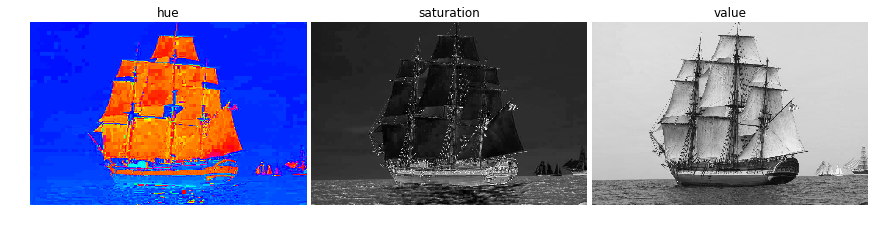

In [500]:
target = cv2.imread("../images/sailing_ship.jpg",cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(target, cv2.COLOR_BGR2HSV)
rgb = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
h,s,v = cv2.split(hsv)
h_image = cv2.cvtColor(np.dstack((h,np.full((h.shape[0],h.shape[1],2),255,dtype="uint8"))),cv2.COLOR_HSV2RGB)
fig,ax = plt.subplots(1,3,figsize = (15,5))
plt.subplots_adjust(wspace=.02, hspace=.02)
for indx, (image,title) in enumerate(zip([h_image,s,v],["hue","saturation","value"])):
    cmap = None if indx == 0 else "gray"
    ax[indx].set_title(title)
    ax[indx].set_axis_off()
    ax[indx].imshow(image,cmap = cmap)
fig.savefig("/home/finn/programming/opencv-play/models/h_s_v_images.jpg",bbox="tight",dpi=300)
   



In [480]:
h.shape
o = np.full((h.shape[0],h.shape[1],2),255,dtype="uint8")

In [481]:
o.shape

(852, 1280, 2)

In [484]:
np.dstack((h,o))

(852, 1280, 3)

In [ ]:
def plot_histogram(ax,indx,img,channels,title):
    plot_settings = {
        "blue":("blue",255),
        "green":("green",255),
        "red":("red",255),
        "hue":("violet",180),
        "saturation":("orange",255),
        "value":("cyan",255),
        "luminosity":("brown",255),
        "grey":("black",255)
        }
    for i,c in enumerate(channels):
        settings = plot_settings.get(c)
        if settings is not None:
            color,channel_max = settings
        else:
            color,channel_max = None,255
            
        hist = cv2.calcHist([img],channels = [i],mask = None, histSize = [channel_max],ranges=[0,channel_max])
        ax[indx].set_xlim(0,channel_max)
        ax[indx].set_title(title)
        ax[indx].plot(hist,color = color,label = c)
    ax[indx].legend(loc="upper right")